In [86]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/italy_own/'

#results_dir = 'exp1_results/'
#graph_xlim = (0, 12)
#graph_ylim = (0, 10)
#gridsize = 200

#results_dir = 'exp2_results/'
#graph_xlim = (-1, 20)
#graph_ylim = (-6, 30)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (2, 11)
#gridsize = 200

#results_dir = 'exp4_results/'
#graph_xlim = (-5, 15)
#graph_ylim = (0, 15)
#gridsize = 2000

#results_dir = 'exp5a_results/'   TODO
#graph_xlim = (-3, 8)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp5b_results/'  TODO
#graph_xlim = (-3, 8)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp6_results/'  TODO
#graph_xlim = (-5, 15)
#graph_ylim = (-2, 17)
#gridsize = 2000

#results_dir = 'exp7_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (0, 10)
#gridsize = 200

results_dir = 'exp8_results/'
graph_xlim = (-5, 10)
graph_ylim = (-1, 15)
gridsize = 1000

# exp1, exp2
#dimension_names_to_visualize = ['Left - economy - Right', 'Favors people over elites']

# exp3, exp4, exp5a, exp5b, exp6
#dimension_names_to_visualize = ['Anti-islam rhetoric (salience)', 'Left - ideology - Right']

# exp7, exp8
dimension_names_to_visualize = ['Anti-islam rhetoric (salience)', 'Favors people over elites']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# FranceOwn
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'ItalyOwn_reference_group.csv'
group_attitudes_file = data_dir + 'ItalyOwn_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'Italy'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

['ches2019_anti_islam_rhetoric', 'ches2019_people_vs_elite']


In [87]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_galtan_dissent
0,0,3.677862,9.418460,0.797038
1,1,4.077633,6.421615,1.990956
2,2,0.518564,3.385133,1.027812
3,3,12.147306,7.839454,-3.335128
4,4,1.132422,9.120332,2.585433


In [88]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(785, 4)
(785, 6)
(686, 7)
(639, 12)


,entity,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_galtan_dissent,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay
0,2,4.298673,11.220290,5.827986,2,2,M5S,green,0.0,0.4,0.1,0.1
1,3,-1.628372,6.012687,7.794606,3,2,M5S,green,0.0,0.4,0.1,0.1
2,5,1.697269,9.142915,6.584357,5,2,M5S,green,0.0,0.4,0.1,0.1
3,11,-5.203714,1.722076,9.099566,11,2,M5S,green,0.0,0.4,0.1,0.1
4,13,-3.991988,2.643093,8.275518,13,2,M5S,green,0.0,0.4,0.1,0.1


In [89]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,FI,125
1,Lega,152
2,M5S,242
3,PD,119
4,RI,1


In [90]:
group_names_df.head(20)

,k,party
0,0,FdI
2,2,M5S
3,3,Lega
5,5,FI
6,6,PD
13,13,RI


In [91]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(16, 3)
(5, 8)


,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,party,color,dim_x,dim_y,dim_ax,dim_ay
0,0.500000,3.357143,RI,#CD6090,-0.1,0.4,0.1,0.1
1,2.533333,9.529411,M5S,green,0.0,0.4,0.1,0.1
2,9.000000,6.937500,Lega,#8968CD,0.2,0.0,0.1,0.1
3,4.800000,4.066667,FI,orange,-0.2,0.3,0.1,0.1
4,1.250000,2.062500,PD,yellow,0.1,-0.5,0.1,0.1


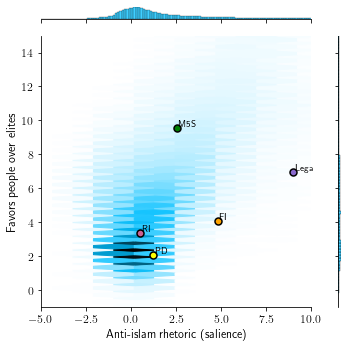

In [92]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) #,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.show()

#plt.savefig('Figures/AttitudinalSpace/ARF_lrgen_enviroment_bio_nucleaire.pdf')
#plt.clf()
#plt.close()